In [1]:
%matplotlib inline
import numpy as np
import skimage
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os
import scipy.misc as sm
import canny_edge_detector as canny

In [7]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def load_data(dir_name = 'directory path'):    
    '''
    Load images from directory, Images are in JPG and we convert it to gray scale images
    '''
    imgs = []
    for filename in os.listdir(dir_name):
        if os.path.isfile(dir_name + '/' + filename):
            img = mpimg.imread(dir_name + '/' + filename)
            img = rgb2gray(img)
            imgs.append(img)
    return imgs


def visualize(imgs, format=None, gray=False):
    plt.figure(figsize=(20, 40))
    for i, img in enumerate(imgs):
        if img.shape[0] == 3:
            img = img.transpose(1,2,0)
        plt_idx = i+1
        plt.subplot(2, 4, plt_idx)
        plt.imshow(img, format)
    plt.show()

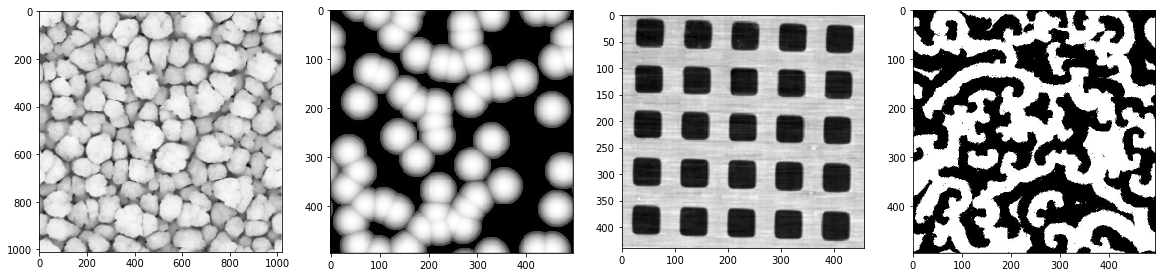

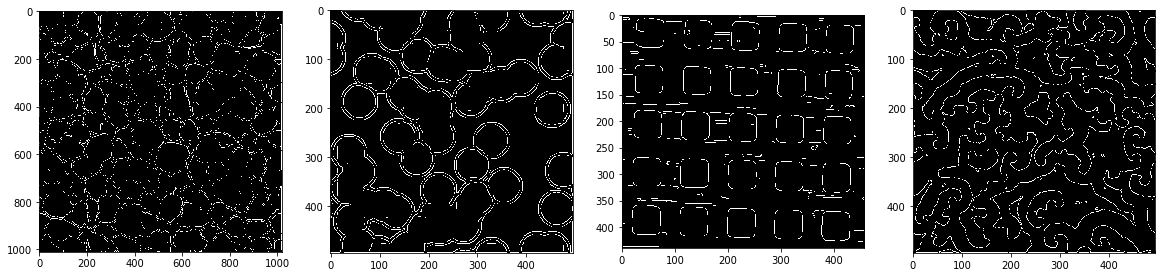

In [8]:
imgs = load_data('afm_imgs')
visualize(imgs, 'gray')

detector = canny.cannyEdgeDetector(imgs, sigma=1.4, 
                                   kernel_size=5, 
                                   lowthreshold=0.09, 
                                   highthreshold=0.15, 
                                   weak_pixel=100)
imgs_final = detector.detect()
visualize(imgs_final, 'gray')